# V.E.R. Earthquake Statistics Analysis
Welcome to the Statistics Analysis for VER earthquake recog. tool!  This notebook will walk you step by step through the process of using the database of tags created by ImageTag tool to create statistics about the earthquake. [installation instructions](https://github.com/tensorflow/models/blob/master/object_detection/g3doc/installation.md) before you start.

# Imports

In [22]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

import csv
from collections import Counter
import tkFileDialog

## Env setup

In [23]:
# This is needed to display the images.
%matplotlib inline

# This is needed since the notebook s stored in the object_detection folder. EED THIS
sys.path.append("..")

## Open file that contains the tag Information
Enter the location of the file where the Image Tag is located. (Output.txt)

In [24]:
opts = {}
opts['filetypes'] = [('Supported types',('.txt'))]

hist= tkFileDialog.askopenfilename(title='Enter File to create histogram',**opts)
if hist == '': 
	print "can't open file"
	quit()
searchDMstrings = ("Shear cracking", "Flexural cracking","Concrete spalling","Concrete core crushing","Longitudinal bar buckling", "Longitudinal bar fracture","Failure of confining hoops/ties","Anchorage/connection failure","Lap splice failure", "Distributed plastic hinging","Concentrated flexural cracking","Global buckling/instability","Shear/diagonal failure", "Shear/compression failure","Interface sliding","Interaction b/w infill and frame","Slab fracture","Punching shear failure","Unseating/collapse of stairs","Pounding","Differential settlement","Residual displacement","soft story fail","Partial/full collapse")

searchSTstrings=("short/captive column","slender column","structural wall","infill wall","tilt-up precast panel","joint-column connection","beam","coupling beam", "foundation beam","floor diaphragm/slab","frame","scissor stairs","corbel/support","cantilevered balcony","construction joint","full Story","full/partial building","unknown")

#open file for reading
fileWL=open(hist,"r")
#create a Counter variable
cntDM=Counter()
for line in fileWL.readlines():
	for word in searchDMstrings:
		if word in line:
			cntDM[word] += 1

fileWL.close()

#Do the same for Structure
fileWL=open(hist,"r")
cntST=Counter()
for line in fileWL.readlines():
	for word in searchSTstrings:
		if word in line:
			cntST[word] += 1

fileWL.close()



# Display Histogram 

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_CKPT` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

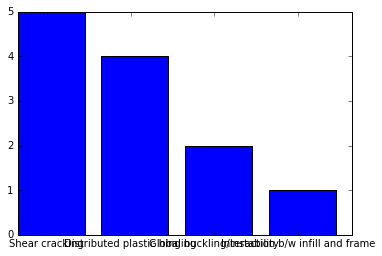

In [25]:
#display the two histograms at the same time
i=0
labels=[]
values=[]
for item in cntDM.most_common(10):
	labels.insert(10,item[0])
	values.insert(10,item[1])
# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
plt.bar(indexes, values)
# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()


## other 

In [26]:
#If your file is not too large, you can read it into a string, and just use that (easier and often faster than reading and checking line per line):

#if 'blabla' in open('example.txt').read():
#    print "true"

#Another trick: you can alleviate the possible memory problems by using mmap.mmap() to create a "string-like" object that uses the underlying file (instead of reading the whole file in memory):

#import mmap
#f = open('example.txt')
#s = mmap.mmap(f.fileno(), 0, access=mmap.ACCESS_READ)
#if s.find('blabla') != -1:
#    print 'true'

#NOTE: in python 3, mmaps behave like bytearray objects rather than strings, so the subsequence you look for with find() has to be a bytes object rather than a string as well, eg. s.find(b'blabla'):

#!/usr/bin/env python3
#import mmap

#with open('example.txt', 'rb', 0) as file, \
#     mmap.mmap(file.fileno(), 0, access=mmap.ACCESS_READ) as s:
#    if s.find(b'blabla') != -1:
#        print('true')

#You could also use regular expressions on mmap e.g., case-insensitive search: if re.search(br'(?i)blabla', s):



#look here for search for multiple strings in a file

#https://stackoverflow.com/questions/32097118/search-text-file-for-multiple-strings-and-print-out-results-to-a-new-text-file